# Hotel Cancellation Forecast - Project
The accomodation industry is a 4.1 Trillion Dollar industry in 2021.
In today's fast-paced world, consumers are becoming more flexible with their stays, "Free Cancellation" offers are helping large booking websites like Booking.com and Hotels.com stay competitive by allowing consumers said flexibility.
However, these offers bring an old-new problem to the table - booking cancellations.
In this project we aim to allow accurate forecasting of booking cancellations in order to aid hotels and booking websites correctly anticipate hotel cancellations and act accordingly to prevent loss and maximize capacity.
##### By Oriel Perets & Dafna Meron


-------

### Project setup
#### Importing dependecies:
1. Core dependecies
    * Numpy
    * Pandas
2. Model dependecies (Scikit Learn)
    * classification
    * cross_val_score
    * RandomForestClassifier
    * Logistic Regressions
    * GaussianNB
    * Model_selection tools
3. Importing data
    * csv --> dataFrame


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('hotel_bookings.csv')

-------

### Data exploration
1. Variable Identification
2. Univariate Analysis
3. Bi-Variate Analysis
4. Missing Values Treatment
5. Outlier Treatment
6. Variable Transofrmation
7. Variable Creation

In [2]:
# Variable identification
df.info()
df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

,Id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
5,6,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
6,7,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,03/07/2015
7,8,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,03/07/2015
8,9,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,06/05/2015
9,10,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/04/2015


#### Variable identification
* Target - 'is_canceled'
* Predictos - all other variables
* Continous:
    * total_of_special_requests
    * required_car_parking_spaces
    * adr
    * days_in_waiting_list
    * adults
    * stays_in_week_nights
    * stays_in_weekend_nights
    * lead_time
* Categorical:
    * hotel
    * arrival_date_month
    * arrival_date_day_of_month
    * arrival_date_week_number
    * deposit_type
    * agent
    * company
    * customer_type    
* Useless (removed):
    * reservation_status
    * reservation_status_date

--------------

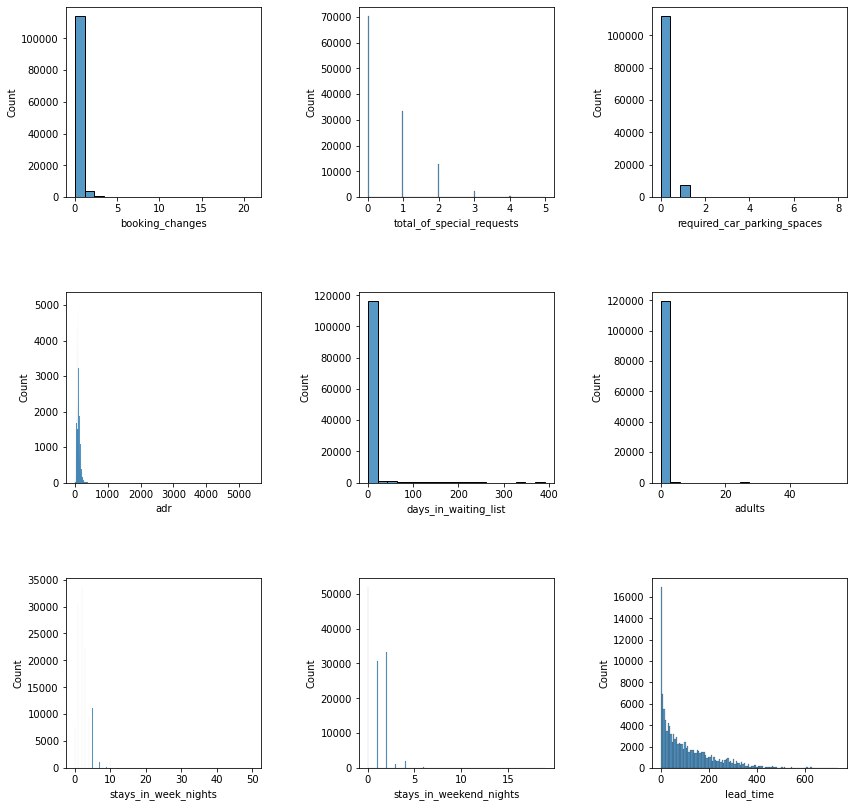

In [3]:
# Univariate analysis
cont_vars = ['booking_changes','total_of_special_requests','required_car_parking_spaces','adr','days_in_waiting_list','adults','stays_in_week_nights','stays_in_weekend_nights','lead_time'
]
# Continous variables
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for var in cont_vars:
    col = cont_vars[index]
    ax = fig.add_subplot(3, 3, plot_idx)
    sns.histplot(df[col], ax=ax)
    index+=1
    plot_idx+=1
plt.show()



-------------------

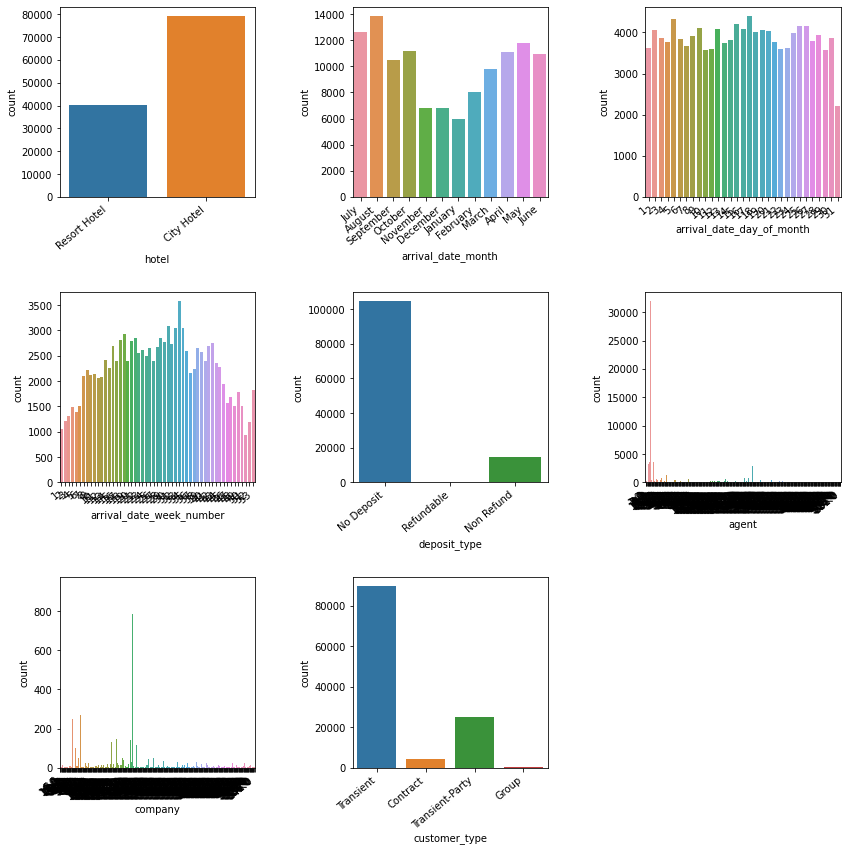

In [4]:
# Univariate analysis
cat_vars = ['hotel','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','deposit_type','agent','company','customer_type'] 
# Categorical variables
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for var in cat_vars:
    col = cat_vars[index]
    ax = fig.add_subplot(3, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    sns.countplot(df[col], ax=ax)
    index+=1
    plot_idx+=1
plt.show()


----------

In [5]:
# Missing Values
print(df.isna().sum())
# Agent, Company - too many missing values
df = df.drop('company',1)
df = df.drop('agent',1)
# Country - fill with 'unknown'
df['country'].fillna('unknown', inplace=True)
# babies - fill with median
df['country'].fillna(df['babies'].median(), inplace=True)

Id                                     0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

----------

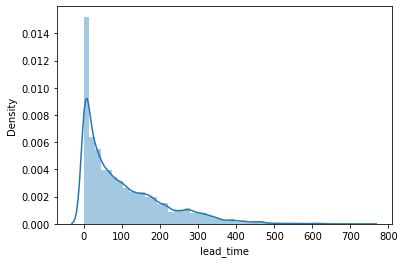

In [6]:
# Variable Transformation
# lead_time -> convert to intervals
df['lead_time'].mean()
ax = sns.distplot(df['lead_time'])
# Intervals -> 0-100 | 100-200 | 200+
lead_time = df['lead_time']
converted = []
for lt in lead_time:
    if lt >= 0 and lt <= 100:
        converted.append(0)
    if lt > 100 and lt < 200:
        converted.append(0)
    if lt >= 200:
        converted.append(0)
# Push to DF
df['t_lead_time'] = converted

In [7]:
# Booking Changes - binning
df['booking_changes'].value_counts()
bkc = df['booking_changes']
t_booking_changes = []
for b in bkc:
    if b == 0:
        t_booking_changes.append(0)
    if b == 1:
        t_booking_changes.append(1)
    if b == 2:
        t_booking_changes.append(2)
    if b >=3 and b<=5:
        t_booking_changes.append(3)
    if b > 5:
        t_booking_changes.append(4)
df['t_booking_changes'] = t_booking_changes

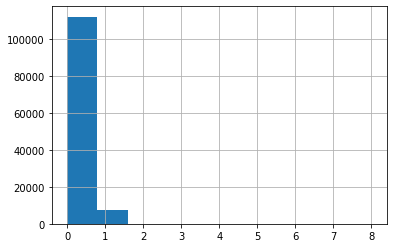

In [8]:
# required_car_parking_space -> Binary
df['required_car_parking_spaces'].hist()
car_parking = df['required_car_parking_spaces']
converted = []
for cp in car_parking:
    if cp == 0:
        converted.append(0)
    else:
        converted.append(1)
# Push to DF
df['t_required_car_parking_spaces'] = converted

In [9]:
# arrival_month -> convert to Integer
month = df['arrival_date_month']
# Map months to integers
dct = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
converted = list(map(dct.get, month))
# Push to DF
df['t_arrival_month'] = converted

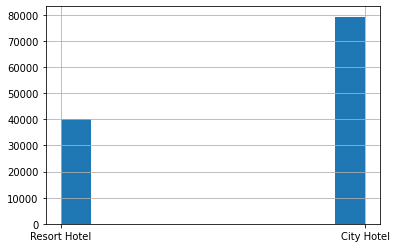

In [10]:
# hotel -> Binary
df['hotel'].hist()
hotel = df['hotel']
# Map hotel to binary
dct = {'City Hotel':0, 'Resort Hotel':1}
converted = list(map(dct.get, hotel))
# Push to DF
df['t_hotel'] = converted

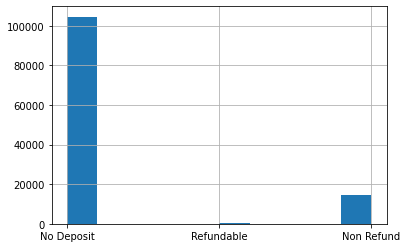

In [11]:
# deposit_type --> Intergers
df['deposit_type'].hist()
deposit = df['deposit_type']
# Map deposit to integers
dct = {'No Deposit' : 0, 'Refundable': 1, 'Non Refundable': 2}
converted = list(map(dct.get, deposit))
# Push to DF
df['t_deposit_type'] = converted

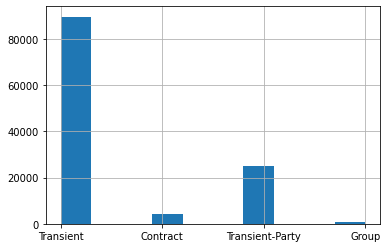

In [12]:
# customer_type -> Integers
df['customer_type'].hist()
customer_type = df['customer_type']
dct = {'Transient' : 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}
converted = list(map(dct.get, customer_type))
# Push to DF
df['t_deposit_type'] = converted

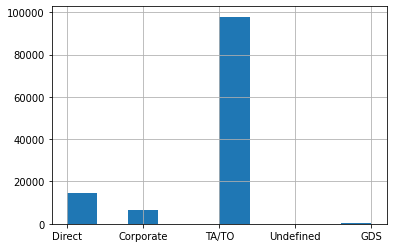

In [13]:
# dist_channel -> Integers
df['distribution_channel'].hist()
channel = df['distribution_channel']
# undefined included into TA/TO for size considerations
dct = {'TA/TO':1 ,'Undefined': 1, 'Corporate': 2, 'Direct': 3, 'GDS': 4, 'Undefined': 5}
converted = list(map(dct.get, channel))
df['t_dist_channel'] = converted

In [14]:
# adr -> binning and labeling as 0,1,2,3
labels = [0,1,2,3]
df['t_average_daily_rate'] = pd.qcut(df['adr'], q=4, labels=labels)

In [15]:
# previous_cancellations -> Binary
prev_can = df['previous_cancellations']
df['previous_cancellations'].value_counts()
converted = []
for pc in prev_can:
    if pc == 0:
        converted.append(0)
    elif pc == 1:
        converted.append(1)
    elif pc > 1 and pc < 5:
        converted.append(2)
    else: #serial canceler
        converted.append(3)
df['t_prev_cancellations'] = converted

-------------

<AxesSubplot:>

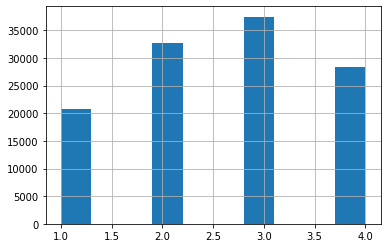

In [16]:
# Variable Creation
# arrival_season -> the season in which the customer arrives @ the hotel
month = df['arrival_date_month']
# months to numbers map
dct = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
t_month = list(map(dct.get, month))
# Map months to seasons
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
season_dct = dict(zip(range(1,13), seasons))
t_seasons = list(map(season_dct.get, t_month))
df['t_arrival_season'] = t_seasons
df['t_arrival_season'].hist()

<AxesSubplot:xlabel='t_party', ylabel='Count'>

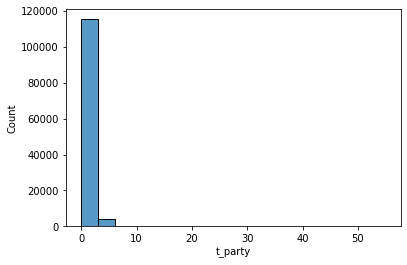

In [17]:
# party_size ->  number of adults + children + babies
party = df['adults'] + df['children'] + df['babies']
party.fillna(0, inplace=True)
df['t_party'] = party

# df['t_party'] = df['t_party'].astype(int)
sns.histplot(df['t_party'])

In [56]:
# Market segment
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [61]:
# Market segment 
ms = df['market_segment']
# months to numbers map
dct = {'Online TA': 1, 'Offline TA/TO': 2, 'Groups': 3, 'Direct': 4, 'Corporate': 5, 'Complementary': 6, 'Aviation': 7, 'Undefined': 1}
t_ms = list(map(dct.get, ms))
df['t_market_segment'] = t_ms

-----------

In [69]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [71]:
# Customer type
ct = df['customer_type']
# months to numbers map
dct = {'Transient': 1, 'Transient-Party': 2, 'Contract': 3, 'Group': 4}
t_ct = list(map(dct.get, ct))
df['t_customer_type'] = t_ct

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

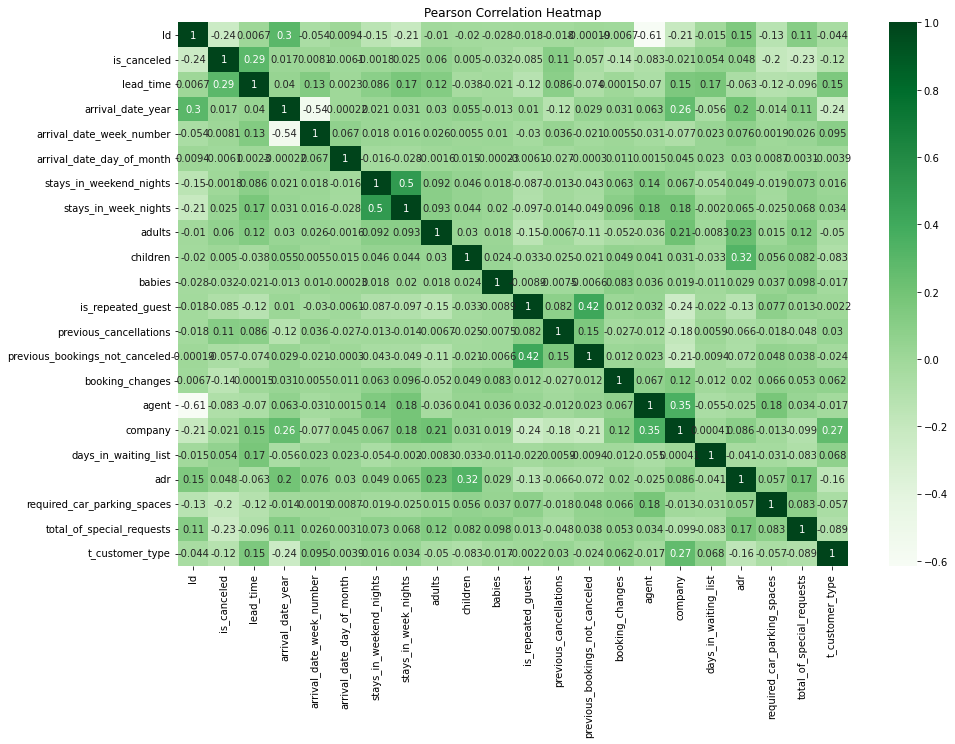

In [73]:
# Correlation heatmap using the pearson method
fig = plt.figure(figsize=(15,10))
clean_df = pd.read_csv('hotel_bookings.csv')
sns.heatmap(clean_df.corr(method='pearson'), annot = True, cmap="Greens")
plt.title("Pearson Correlation Heatmap")

## Model 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Id                              119390 non-null  int64   
 1   hotel                           119390 non-null  object  
 2   is_canceled                     119390 non-null  int64   
 3   lead_time                       119390 non-null  int64   
 4   arrival_date_year               119390 non-null  int64   
 5   arrival_date_month              119390 non-null  object  
 6   arrival_date_week_number        119390 non-null  int64   
 7   arrival_date_day_of_month       119390 non-null  int64   
 8   stays_in_weekend_nights         119390 non-null  int64   
 9   stays_in_week_nights            119390 non-null  int64   
 10  adults                          119390 non-null  int64   
 11  children                        119386 non-null  float64 
 12  ba

In [143]:
# Splitting with sklearn train_test_split
t_cols = ['t_booking_changes','t_average_daily_rate','t_prev_cancellations', 't_hotel', 'lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','adults','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests','t_market_segment','t_customer_type','adr','days_in_waiting_list']
X_train, X_test, y_train, y_test = train_test_split(df[t_cols], df['is_canceled'], test_size=0.2, random_state=42)

In [144]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators = 300, random_state = 0)

In [145]:
# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# m = GaussianNB(priors=None, var_smoothing=1e-09)

In [146]:
# # Logistic Regression
# from sklearn.linear_model import LogisticRegression  
# m = LogisticRegression(penalty='l2')

In [147]:
m.fit(X_train, y_train)
y_pred = m.predict(X_test)

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

In [148]:
pred = pd.DataFrame()
pred['true'] = y_test
pred['predict'] = y_pred

In [149]:
pred['predict'].value_counts()

0    15767
1     8111
Name: predict, dtype: int64

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14907
           1       0.83      0.75      0.79      8971

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878



#### Model report:
* cols = ['t_average_daily_rate','t_prev_cancellations', 't_hotel', 't_lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces']
* f1 weighted - .63 - low 1's higher 0's
* high recall for 0
* low recall for 1
* medium precision for 1's and 0's

#### Model report #02:
* cols = ['t_average_daily_rate','t_prev_cancellations', 't_hotel', 't_lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','t_party']

* f1 weighted - .68 - pretty equal 1's and 0's
* higher recall for 0
* low recall for 1
* medium precision for 1's and 0's

#### Model report #03:
* cols = ['t_booking_changes','t_average_daily_rate','t_prev_cancellations', 't_hotel', 't_lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','t_party']

* f1 weighted - .70 - pretty equal 1's and 0's
* higher recall for 0
* low recall for 1
* medium precision for 1's and 0's

#### Model report #04:
* cols = ['t_booking_changes','t_average_daily_rate','t_prev_cancellations', 't_hotel', 't_lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','t_party','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']

* f1 weighted - .78 - 0's higher then
* higher recall for 0
* low recall for 1
* high precision for 1's and 0's

#### Model report #04:
* cols = ['t_booking_changes','t_average_daily_rate','t_prev_cancellations', 't_hotel', 't_lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','adults','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests','t_market_segment',

* f1 weighted - .80 - 0's higher then 1's
* higher recall for 0
* low recall for 1
* high precision for 1's and 0's

#### Model report #05:
* cols = ['t_booking_changes','t_average_daily_rate','t_prev_cancellations', 't_hotel', 'lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','adults','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests','t_market_segment',

* f1 weighted - .83 - 0's higher then 1's
* higher recall for 0
* medium recall for 1
* high precision for 1's and 0's
* used the raw lead_time instead of t_lead_time

In [28]:
 # Evalutating the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(m, X_train, y_train , cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.01)
